In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/easterlies-collaborative/'

# Old bottom and upper

In [5]:
slev_surf = {}
slev_bott = {}
for k in ['ctrl', 'up', 'down']:
    slev_surf[k] = xr.open_dataset('slev_surf_'+k+'_shelf.nc')['__xarray_dataarray_variable__']
    slev_bott[k] = xr.open_dataset('slev_bott_'+k+'_shelf.nc')['__xarray_dataarray_variable__']

Text(0, 0.5, 'Sea level [m]')

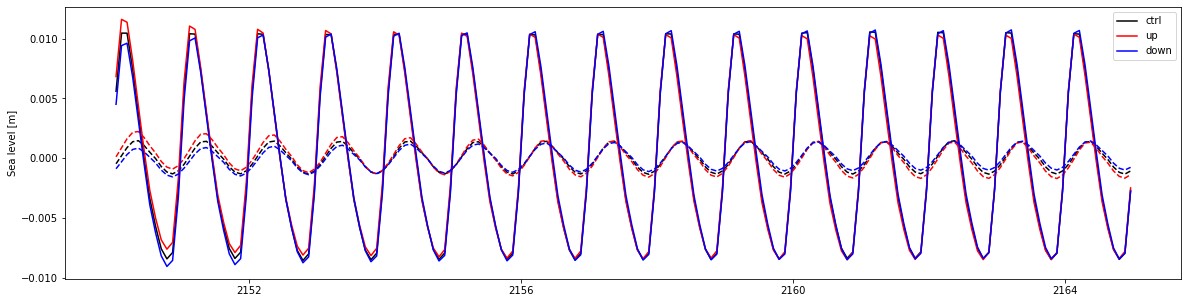

In [14]:
plt.figure(figsize = (20,5))
for k, clr in zip(['ctrl', 'up', 'down'], ['k', 'r', 'b']):
    plt.plot(slev_surf[k]['time'], -slev_surf[k], color = clr, label = k)
    plt.plot(slev_bott[k]['time'], -slev_bott[k], color = clr, linestyle = '--')
plt.legend()
plt.ylabel('Sea level [m]')

Text(0, 0.5, 'Sea level anom [m]')

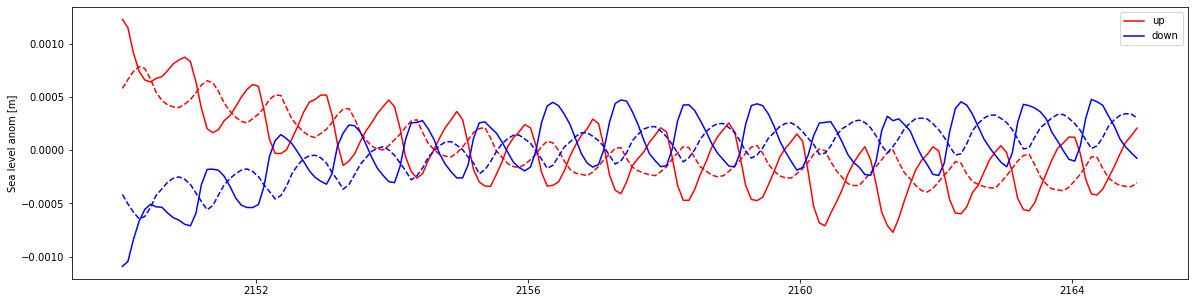

In [13]:
plt.figure(figsize = (20,5))
for k, clr in zip(['up', 'down'], ['r', 'b']):
    plt.plot(slev_surf[k]['time'], -(slev_surf[k]-slev_surf['ctrl']), color = clr, label = k)
    plt.plot(slev_bott[k]['time'], -(slev_bott[k]-slev_bott['ctrl']), color = clr, linestyle = '--')
plt.legend()
plt.ylabel('Sea level anom [m]')

# Entire column

In [12]:
steric_ssh_control = -xr.open_dataset('slev_steric_onshelf_control.nc')['__xarray_dataarray_variable__']
steric_ssh_up = -xr.open_dataset('slev_steric_onshelf_up.nc')['__xarray_dataarray_variable__']
steric_ssh_down = -xr.open_dataset('slev_steric_onshelf_down.nc')['__xarray_dataarray_variable__']

In [16]:
steric_ssh_dzt_up = -xr.open_dataset('slev_steric_onshelf_dzt_up.nc')['__xarray_dataarray_variable__']
steric_ssh_dzt_down = -xr.open_dataset('slev_steric_onshelf_dzt_down.nc')['__xarray_dataarray_variable__']

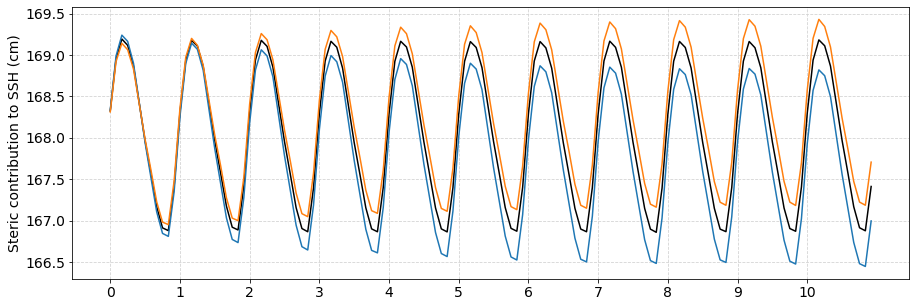

In [6]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (15, 5))
plt.plot(np.arange(0, 132, 1), steric_ssh_control*100, 'k')
plt.plot(np.arange(0, 132, 1), steric_ssh_up*100, 'C0')
plt.plot(np.arange(0, 132, 1), steric_ssh_down*100, 'C1')
plt.ylabel('Steric contribution to SSH (cm)')
plt.grid(linestyle = '--', color = 'lightgrey')
plt.xticks(np.arange(0, 132, 12), np.arange(0,11,1));
plt.savefig(figdir+'steric_total_changes_updownctrl.jpg', bbox_inches = 'tight')

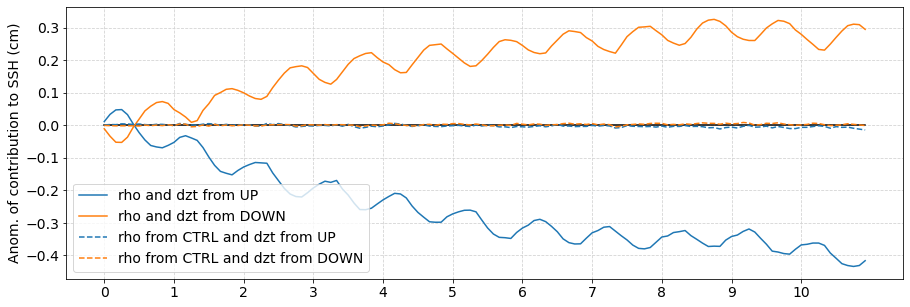

In [18]:
plt.rcParams['font.size'] = 14
plt.figure(figsize = (15, 5))
plt.plot(np.arange(0, 132, 1), steric_ssh_control*0, 'k')
plt.plot(np.arange(0, 132, 1), (steric_ssh_up-steric_ssh_control)*100, 'C0', label = 'rho and dzt from UP')
plt.plot(np.arange(0, 132, 1), (steric_ssh_down-steric_ssh_control)*100, 'C1', label = 'rho and dzt from DOWN')
plt.plot(np.arange(0, 132, 1), (steric_ssh_dzt_up-steric_ssh_control)*100, 'C0', linestyle = '--', label = 'rho from CTRL and dzt from UP')
plt.plot(np.arange(0, 132, 1), (steric_ssh_dzt_down-steric_ssh_control)*100, 'C1', linestyle = '--', label = 'rho from CTRL and dzt from DOWN')
plt.ylabel('Anom. of contribution to SSH (cm)')
plt.legend()
plt.grid(linestyle = '--', color = 'lightgrey')
plt.xticks(np.arange(0, 132, 12), np.arange(0,11,1));
plt.savefig(figdir+'steric_total_changes_updownanom_with_alt.jpg', bbox_inches = 'tight')